# IMPORT LIBRARIES

In [115]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report




# LOAD THE DATASET

In [116]:
dftrain = pd.read_csv(r'C:\Users\sedib\Desktop\EDSA\classification sprint\train.csv')
dftest = pd.read_csv(r'C:\Users\sedib\Desktop\EDSA\classification sprint\test.csv')
dfsampp = pd.read_csv(r'C:\Users\sedib\Desktop\EDSA\classification sprint\sample_submission.csv')
#the header&index makes sure you data is not interpreted incorrectly as in placing the first row of your column aas heading
dftrain.copy()
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
sentiment    15819 non-null int64
message      15819 non-null object
tweetid      15819 non-null int64
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [87]:
#check the null values
dftrain.isna().sum()
#check the statistics of the data
dftrain.describe()
#check for correlation
dftrain.corr()

,sentiment,tweetid
sentiment,1.000000,-0.003758
tweetid,-0.003758,1.000000


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


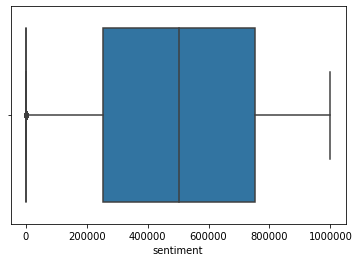

In [88]:
#check for outliers
import seaborn as sns
d = sns.boxplot(x=dftrain['tweetid'])
print(d)
s = sns.boxplot(x=dftrain['sentiment'])
print(s)

# please note that this  a TRIAL and better improvement can be done, i am currently busy with pre.processings.

In [99]:
#set the DataFrame index using existing columns
out = dftest.set_index('tweetid')

SPLIT THE DATA INTO TWO SUBSETS

In [118]:
x = dftrain['message']
y  = dftrain['sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)

In [119]:
#text feature extraction
see = Pipeline([('tfidf', TfidfVectorizer()),('classify', LinearSVC())])
see.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classify',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
          

In [103]:
pred = see.predict(x_test)

In [121]:
x_unsampled = out['message']

In [122]:
y_pred = see.predict(x_unsampled)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          -1       0.67      0.52      0.59       126
           0       0.66      0.42      0.51       224
           1       0.80      0.87      0.83       895
           2       0.76      0.83      0.79       337

    accuracy                           0.77      1582
   macro avg       0.72      0.66      0.68      1582
weighted avg       0.76      0.77      0.76      1582



In [106]:
final = out.index
final_output = {'tweetid' : final, 'sentiment' : np.round(y_pred, 0 )}


In [114]:
deliver = pd.DataFrame(data = final_output)
deliver = deliver[['tweetid', 'sentiment']]
deliver.set_index('tweetid')

deliver.to_csv(r'C:\Users\sedib\Desktop\trial_submission.csv', index = False, header=True)
deliver.set_index('tweetid')

,sentiment
tweetid,
169760,1
35326,1
224985,1
476263,1
872928,0
...,...
895714,1
875167,1
78329,2


In [112]:
deliver.to_csv(r'C:\Users\sedib\Desktop\trial_submission.csv', index = False, header=True)

print(deliver)

       tweetid  sentiment
0       169760          1
1        35326          1
2       224985          1
3       476263          1
4       872928          0
...        ...        ...
10541   895714          1
10542   875167          1
10543    78329          2
10544   867455          0
10545   470892          1

[10546 rows x 2 columns]
